Class 1 :
[2.+0.j]
Class 2 :
[1.2246468e-16+2.j]
Class 3 :
[-2.+2.4492936e-16j]
Class 4 :
[-3.6739404e-16-2.j]
Class 5 :
Class 6 :
Class 7 :
Class 8 :
Class 9 :
Class 10 :
Class 11 :
Class 12 :
Class 13 :
Class 14 :
Class 15 :
Class 16 :


Text(0.5, 1.0, 'original')

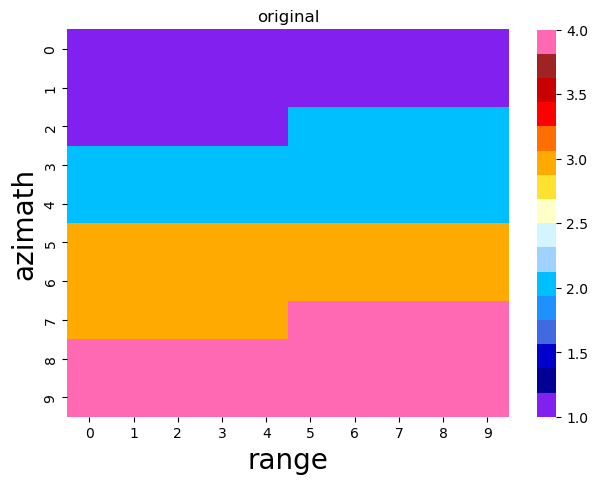

In [3]:
import sys
sys.path.append('/Users/CHJ/文稿/weekly_report/CSOM/minisom')
sys.path.append(r'/Users/CHJ/文稿/无人机sar/yamakawa/pi_data/SAR_program')

import cmaps
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import SA_func as sa
import seaborn as sns
from skimage import io
import sympy as sp

## defining the parameters
ch = 8 # channel
ad_samp_point = 512  # sampling points in the range direction
az_n = 2000 # pixels in the azimuth direction
az_dt =0.01
light_speed = sa.light_speed
df = sa.df
dr = sa.dr
ad_samp_point = sa.ad_samp_point
chirp_rate = sa.chirp_rate
d_tau = df / chirp_rate
dir_name = ""
add_name = ""
filename = "fft_data"

# fft_data = sa.read_fft_data(filename)
# data = sa.code_V_convert(fft_data)
# raw_data = sa.get_raw_data(data)
# # index = [700, 1200, 0, 50]
# index = [0, 2000, 0, 50]
# az_s_index = index[0]
# az_e_index = index[1]
# az_len = az_e_index - az_s_index
# rg_s_index = index[2]
# rg_e_index = index[3]
# rg_len = rg_e_index - rg_s_index
# plt.figure(figsize = (12,8))

# # ampを抽出,amp_dataは20log化データ
# data = raw_data[0] #raw_data (8,2000,512)
# amp_data = 20 * np.log10(np.abs(data[az_s_index:az_e_index, rg_s_index:rg_e_index]))
# phase_data = np.angle(data[az_s_index:az_e_index, rg_s_index:rg_e_index])
# amp_phase = np.stack((amp_data, phase_data),axis=-1)
# amp_phase_two_column = np.reshape(amp_phase, (-1, 2))
# "amp_data = np.clip(amp_data, -30, 30) #（500，50）"

''' 8 channelのTX-RX振幅と位相を(500,50,16)に変換'''

# rectangular test, phase = [0, 3/4pi]
test_array = np.zeros((10, 10), dtype=complex)
QUAD_ONE = 2
QUAD_TWO = 2*cmath.exp(1j*math.pi/2)
QUAD_THREE = 2*cmath.exp(1j*math.pi)
QUAD_FOUR = 2*cmath.exp(1j*3*math.pi/2)
flatten_test_array = np.reshape(test_array, (-1, 1))
flatten_test_array[:25,0] = QUAD_ONE
flatten_test_array[25:50,0] = QUAD_TWO
flatten_test_array[50:75,0] = QUAD_THREE
flatten_test_array[75:100,0] = QUAD_FOUR
test_array = np.reshape(flatten_test_array, (10, 10))

clustered = np.zeros((*test_array.shape, 1), dtype=np.float64)

# 初始化类别标号
class_labels = np.zeros((flatten_test_array.shape[0],), dtype=int)
current_label = 1

# 遍历每个向量
for i, vector in enumerate(flatten_test_array):
    # 如果已经被分为类别，则跳过
    if class_labels[i] != 0:
        continue

    # 将当前向量标记为当前类别
    class_labels[i] = current_label

    # 查找与当前向量完全相同的向量，并标记为相同类别
    for j in range(i+1, flatten_test_array.shape[0]):
        if np.array_equal(vector, flatten_test_array[j]):
            class_labels[j] = current_label

    # 增加类别标号
    current_label += 1

    # 各ラベルに対応するベクトルを取得
for i in range(1, 17):
    print("Class", i, ":")
    for j in range(len(class_labels)):
        if class_labels[j] == i:
            print(flatten_test_array[j])
            break

# 将类别标号重新整形回与clustered相同的形状
class_labels = class_labels.reshape(clustered.shape[:-1])

# # (500,50,8,2)に変換、8チャンネルの一つのベクトルにampとphase数値が入っている
# amp_phase = np.zeros((500, 50, 8, 2))

# for i in range(8):
#     data = raw_data[i]  # raw_data (8, 2000, 512)
#     amp_data = 20 * np.log10(np.abs(data[az_s_index:az_e_index, rg_s_index:rg_e_index]))
#     phase_data = np.angle(data[az_s_index:az_e_index, rg_s_index:rg_e_index])
#     amp_phase_i = np.stack((amp_data, phase_data), axis=-1)
#     amp_phase[:, :, i, :] = amp_phase_i


# complex_val_8_column = np.reshape(complex_val, (-1, 8))
# amp_phase_16_column = np.reshape(amp_phase, (-1, 8, 2))
all_font = 20
# my_cmap = cmaps.precip2_15lev
# my_cmap.set_under('w')
sns.heatmap(class_labels, cmap=cmaps.amwg_blueyellowred)
plt.xlabel("range", fontsize = all_font)
plt.ylabel("azimath", fontsize = all_font)
plt.tight_layout()
plt.title("original")

['/Users/CHJ/文稿/weekly_report/CSOM', '/Users/CHJ/miniforge3/envs/practice/lib/python39.zip', '/Users/CHJ/miniforge3/envs/practice/lib/python3.9', '/Users/CHJ/miniforge3/envs/practice/lib/python3.9/lib-dynload', '', '/Users/CHJ/miniforge3/envs/practice/lib/python3.9/site-packages', '/Users/CHJ/文稿/weekly_report/CSOM/minisom', '/Users/CHJ/文稿/无人机sar/yamakawa/pi_data/SAR_program', '/Users/CHJ/文稿/weekly_report/CSOM/minisom', '/Users/CHJ/文稿/无人机sar/yamakawa/pi_data/SAR_program']
training...
quantization...
building new image...
Class 1 :
2.0 0
Class 2 :
2.0 0.5/pi
Class 3 :
Class 4 :
Class 5 :
Class 6 :
Class 7 :
Class 8 :
done.


Text(0.5, 1.0, 'Clustering Result')

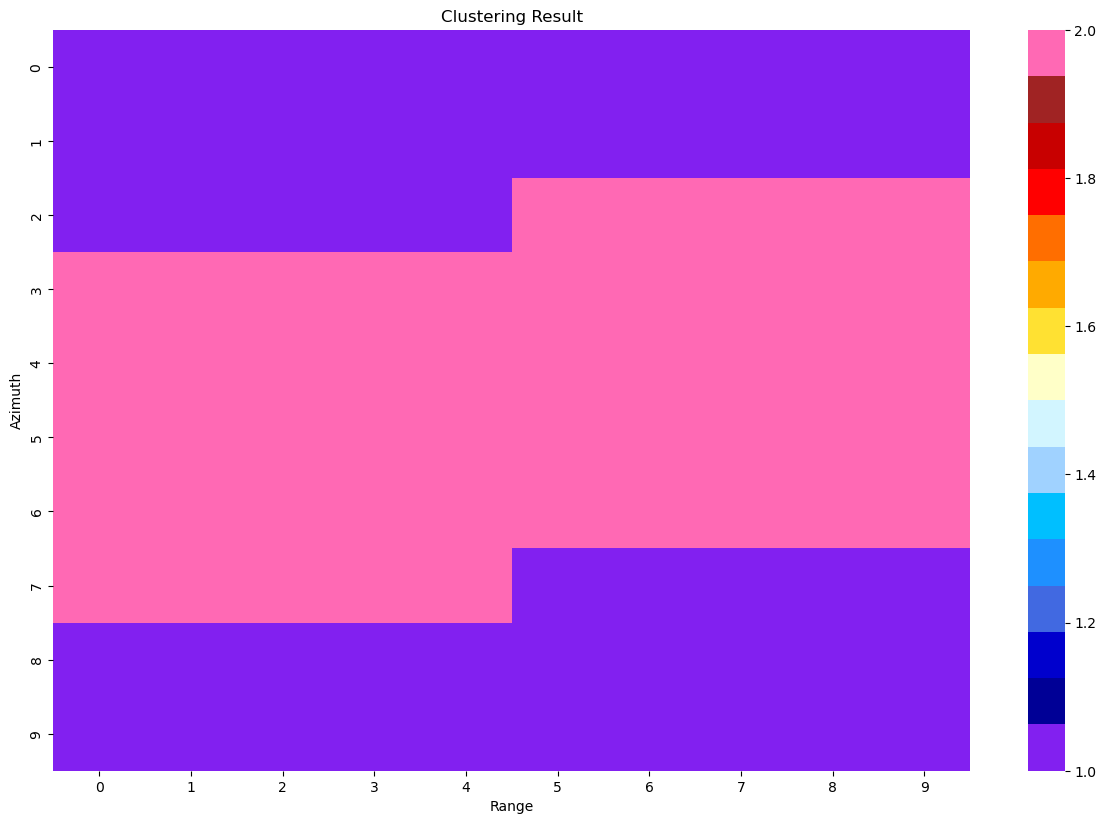

In [4]:
# sys.path.insert(0,'/Users/CHJ/文稿/weekly_report/CSOM/minisom') # when the module name is same as built-in module, can not use from ... import ...
print(sys.path) # check if the path is added in front of the system path

import CSOM_ring

# Reshaping the pixels matrix
# pixels = np.reshape(img, (img.shape[0]*img.shape[1], 1))
pixels = flatten_test_array
# SOM initialization and training
print('training...')
som = CSOM_ring.MiniSom_ring(4, 1, sigma=0.,
              learning_rate=0.0000000000001, neighborhood_function='bubble', activation_distance='hermitian_product')  # 16 neurons, 16 dimensions vectors in each neuron, neighborhood radius is 2
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # Saving the starting weights
som.train_ring(pixels, 5, random_order=True, verbose=False, use_epochs=True)

print('quantization...')
qnt = som.quantization(pixels)  # Quantize each pixels of the image

print('building new image...')
clustered = np.zeros((test_array.shape), dtype=complex)
for i, q in enumerate(qnt):  # Place the quantized values into a new image, i=index, q=quantized value
    clustered[np.unravel_index(i, shape=(test_array.shape[0], test_array.shape[1]))] = q
labelled = np.zeros((*test_array.shape, 1), dtype=np.float64)
flattened = clustered.reshape(-1, 1)

# Initialize class labels and current label
class_labels = np.zeros((flattened.shape[0],), dtype=int)
current_label = 1
# Traverse the flattened array
for i, vector in enumerate(flattened):
    # If the vector is already labeled, skip it
    if class_labels[i] != 0:
        continue
    # Label the vector if it is not labeled before
    class_labels[i] = current_label
    # Search for the same vector in the remaining vectors, and label them
    for j in range(i+1, flattened.shape[0]):
        if np.array_equal(vector, flattened[j]):
            class_labels[j] = current_label
    current_label += 1
# Print the class labels and the corresponding vectors
for i in range(1, 9):
    print("Class", i, ":")
    for j in range(len(class_labels)):
        if class_labels[j] == i:
            print((cmath.polar(flattened[j]))[0],(cmath.polar(flattened[j]))[1]/math.pi/sp.pi)
            break
# Reshape the class labels to the shape of the original image
class_labels = class_labels.reshape([10,10])

print('done.')


# # amp heatmap
# for i in range(8):
#     all_font = 20
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(clustered[:,:,i], cmap="precip2_15lev",vmin = -30, vmax = 30) # amp image, 0-7
#     name = ["", "range [m]", "azimuth [s]"]
#     dx = d_tau * light_speed / 2 / 2
#     dy = 0.01
#     x_step = int(rg_len / 25) + 1
#     y_step = int(az_len / 20)
#     plt.xticks(np.arange(0, rg_e_index - rg_s_index, step = x_step), np.round(np.arange(rg_s_index * dx, rg_e_index * dx, step = dx * x_step), 2), fontsize = all_font, rotation = 90)
#     plt.yticks(np.arange(0, az_e_index - az_s_index, step = y_step), np.round(np.arange(az_s_index * dy, az_e_index * dy, step = dy * y_step), 2), fontsize = all_font)
#     plt.title(name[0])
#     plt.xlabel(name[1], fontsize = all_font)
#     plt.ylabel(name[2], fontsize = all_font)
#     plt.tight_layout()
#     plt.xlabel("Range")
#     plt.ylabel("Azimuth")
#     plt.title("Clustering Result")
#     plt.savefig('amp_' +str(i)+ ".pdf", format = "pdf", bbox_inches = 'tight')

# # phase heatmap
# for j in range(8,16,1):
#     all_font = 20
#     plt.figure(figsize=(12, 8))
#     my_cmap = cm.get_cmap('precip2_15lev')
#     my_cmap.set_under('w')
#     sns.heatmap(class_labels[:,:,j], cmap=my_cmap) # phase image, 8-15
#     name = ["", "range [m]", "azimuth [s]"]
#     dx = d_tau * light_speed / 2 / 2
#     dy = 0.01
#     x_step = int(rg_len / 25) + 1
#     y_step = int(az_len / 20)
#     plt.xticks(np.arange(0, rg_e_index - rg_s_index, step = x_step), np.round(np.arange(rg_s_index * dx, rg_e_index * dx, step = dx * x_step), 2), fontsize = all_font, rotation = 90)
#     plt.yticks(np.arange(0, az_e_index - az_s_index, step = y_step), np.round(np.arange(az_s_index * dy, az_e_index * dy, step = dy * y_step), 2), fontsize = all_font)
#     plt.title(name[0])
#     plt.xlabel(name[1], fontsize = all_font)
#     plt.ylabel(name[2], fontsize = all_font)
#     plt.tight_layout()
#     plt.xlabel("Range")
#     plt.ylabel("Azimuth")
#     plt.title("Clustering Result")
#     plt.savefig('phase_' +str(j)+ ".pdf", format = "pdf", bbox_inches = 'tight')

all_font = 20
plt.figure(figsize=(12, 8))
# my_cmap = cmaps.precip2_15lev
# my_cmap.set_under('w')
sns.heatmap(class_labels, cmap=cmaps.amwg_blueyellowred)
# name = ["", "range [m]", "azimuth [s]"]
# dx = d_tau * light_speed / 2 / 2
# dy = 0.01
# x_step = int(rg_len / 25) + 1
# y_step = int(az_len / 20)
# plt.xticks(np.arange(0, rg_e_index - rg_s_index, step = x_step), np.round(np.arange(rg_s_index * dx, rg_e_index * dx, step = dx * x_step), 2), fontsize = all_font, rotation = 90)
# plt.yticks(np.arange(0, az_e_index - az_s_index, step = y_step), np.round(np.arange(az_s_index * dy, az_e_index * dy, step = dy * y_step), 2), fontsize = all_font)
plt.tight_layout()
plt.xlabel("Range")
plt.ylabel("Azimuth")
plt.title("Clustering Result")

